# 00 - Setup et vérification de l'environnement

**Objectif** : Vérifier que toutes les dépendances sont installées et fonctionnelles.

**Auteurs** : Grégoire Marguier - Pierre Robin-Schnepf
**Date** : 17 octobre 2024

In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

print("✅ Tous les imports fonctionnent !")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

✅ Tous les imports fonctionnent !
Python version: 3.13.8 (main, Oct 13 2025, 02:14:45) [GCC 13.3.0]
Pandas version: 2.3.3
Numpy version: 2.3.3


In [13]:
"""
## Test de téléchargement de données
"""
# Test simple : télécharger 1 semaine de données Apple
ticker = "AAPL"
data = yf.download(ticker, period="5d", interval="1d")
data.columns = data.columns.get_level_values(0) 
print(f"\n✅ Téléchargement réussi : {len(data)} jours de données pour {ticker}")
print(data.head())

/tmp/ipykernel_1386/3184148164.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


✅ Téléchargement réussi : 5 jours de données pour AAPL
Price            Close        High         Low        Open    Volume
Date                                                                
2025-10-13  247.660004  249.690002  245.559998  249.380005  38142900
2025-10-14  247.770004  248.850006  244.699997  246.600006  35478000
2025-10-15  249.339996  251.820007  247.470001  249.490005  33893600
2025-10-16  247.449997  249.039993  245.130005  248.250000  39698000
2025-10-17  249.610001  250.320007  247.270004  248.020004  12172479


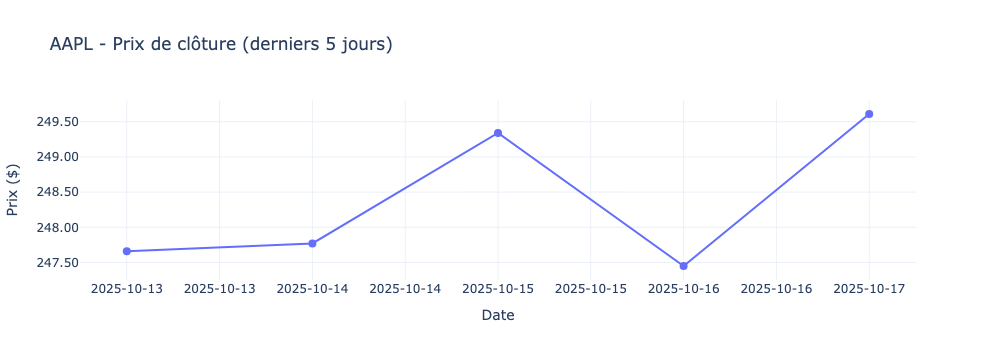

✅ Plotly fonctionne correctement !


In [14]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data.index, 
    y=data['Close'],
    mode='lines+markers',
    name='Close Price',
    line=dict(width=2),
    marker=dict(size=8)
))

fig.update_layout(
    title=f"{ticker} - Prix de clôture (derniers 5 jours)",
    xaxis_title="Date",
    yaxis_title="Prix ($)",
    xaxis=dict(
        tickformat='%Y-%m-%d',  # Format de date lisible
        tickmode='auto'
    ),
    yaxis=dict(
        tickformat=',.2f'  # 2 décimales seulement
    ),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()
print("✅ Plotly fonctionne correctement !")

In [15]:
"""
## Vérification de la structure
"""
import os
from pathlib import Path

project_root = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
required_dirs = ['data', 'data/raw', 'data/processed', 'src', 'notebooks', 'tests']

print("\n📁 Structure du projet :")
for dir_path in required_dirs:
    full_path = project_root / dir_path
    exists = "✅" if full_path.exists() else "❌"
    print(f"{exists} {dir_path}/")


📁 Structure du projet :
✅ data/
✅ data/raw/
✅ data/processed/
✅ src/
✅ notebooks/
✅ tests/


In [16]:
# Cellule 6 : Test import modules custom
"""
## Test des modules custom
"""
sys.path.append(str(project_root / 'src'))

# On va créer un module simple pour tester
test_code = '''
def hello_project():
    """Fonction de test simple"""
    return "✅ Les imports custom fonctionnent !"
'''

# Écrire temporairement
with open(project_root / 'src' / 'utils.py', 'w') as f:
    f.write(test_code)

# Importer
from utils import hello_project
print(hello_project())

✅ Les imports custom fonctionnent !


In [17]:
"""
## ✅ Configuration validée !

Tout est prêt pour commencer le projet. Prochaines étapes :
1. Collecte des données (`01_data_collection.ipynb`)
2. Analyse exploratoire (`02_exploratory_analysis.ipynb`)
3. Modélisation du slippage (`03_slippage_models.ipynb`)
4. Almgren-Chriss (`04_almgren_chriss.ipynb`)
"""
print("\n" + "="*50)
print("🎉 SETUP COMPLET - VOUS POUVEZ COMMENCER !")
print("="*50)


🎉 SETUP COMPLET - VOUS POUVEZ COMMENCER !
